In [1]:
import fxcmpy
import time
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import pylab
from pylab import plt, mpl

api = fxcmpy.fxcmpy(access_token='1787dbb385a48cf9b67e92e4b2bda2bee3664d40', log_level='error')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
print('no fail')


no fail


In [3]:
%matplotlib inline

In [4]:
from fxcmpy import fxcmpy_tick_data_reader as tdr

In [6]:
print(tdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [7]:
start = dt.datetime(2018, 6, 25)
stop = dt.datetime(2018, 6, 30)

In [8]:
td = tdr('EURUSD', start, stop)

In [10]:
td.get_raw_data().info()

<class 'pandas.core.frame.DataFrame'>
Index: 1963779 entries, 06/24/2018 21:00:12.290 to 06/29/2018 20:59:00.607
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9+ MB


In [11]:
td.get_data().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1963779 entries, 2018-06-24 21:00:12.290000 to 2018-06-29 20:59:00.607000
Data columns (total 2 columns):
Bid    float64
Ask    float64
dtypes: float64(2)
memory usage: 44.9 MB


In [16]:
td.get_data().head()

,Bid,Ask
2018-06-24 21:00:12.290,1.1662,1.16660
2018-06-24 21:00:16.046,1.1662,1.16650
2018-06-24 21:00:22.846,1.1662,1.16658
2018-06-24 21:00:22.907,1.1662,1.16660
2018-06-24 21:00:23.441,1.1662,1.16663


In [17]:
sub = td.get_data(start='2018-06-29 12:00:00', end='2018-06-29 12:15:00')

In [18]:
sub.head()

,Bid,Ask
2018-06-29 12:00:00.011,1.16497,1.16498
2018-06-29 12:00:00.071,1.16497,1.16497
2018-06-29 12:00:00.079,1.16497,1.16498
2018-06-29 12:00:00.091,1.16495,1.16498
2018-06-29 12:00:00.205,1.16496,1.16498


In [26]:
sub['Mid'] = sub.mean(axis=1)

In [27]:
sub['SMA'] = sub['Mid'].rolling(1000).mean()

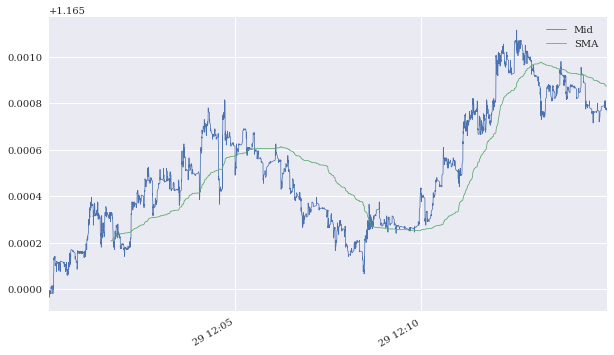

In [28]:
sub[['Mid', 'SMA']].plot(figsize=(10,6), lw=0.75)

In [29]:
from fxcmpy import fxcmpy_candles_data_reader as cdr

In [30]:
print(cdr.get_available_symbols())

('AUDCAD', 'AUDCHF', 'AUDJPY', 'AUDNZD', 'CADCHF', 'EURAUD', 'EURCHF', 'EURGBP', 'EURJPY', 'EURUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'GBPUSD', 'GBPCHF', 'GBPJPY', 'GBPNZD', 'NZDCAD', 'NZDCHF', 'NZDJPY', 'NZDUSD', 'USDCAD', 'USDCHF', 'USDJPY')


In [31]:
start = dt.datetime(2018,5,1)
end = dt.datetime(2018,6,30)

In [32]:
period = 'H1'

In [62]:
candles = cdr('EURUSD', start, stop , period)

In [63]:
data = candles.get_data()

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6278 entries, 2016-12-27 00:00:00 to 2017-12-29 21:00:00
Data columns (total 8 columns):
BidOpen     6278 non-null float64
BidHigh     6278 non-null float64
BidLow      6278 non-null float64
BidClose    6278 non-null float64
AskOpen     6278 non-null float64
AskHigh     6278 non-null float64
AskLow      6278 non-null float64
AskClose    6278 non-null float64
dtypes: float64(8)
memory usage: 441.4 KB


In [65]:
data[data.columns[:4]].tail()

,BidOpen,BidHigh,BidLow,BidClose
2017-12-29 17:00:00,1.20221,1.20255,1.20190,1.20215
2017-12-29 18:00:00,1.20215,1.20240,1.20119,1.20136
2017-12-29 19:00:00,1.20136,1.20142,1.20071,1.20093
2017-12-29 20:00:00,1.20093,1.20107,1.19976,1.19981
2017-12-29 21:00:00,1.19981,1.20076,1.19918,1.20049


In [66]:
data[data.columns[4:]].tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-29 17:00:00,1.20222,1.20256,1.20189,1.20216
2017-12-29 18:00:00,1.20216,1.20240,1.20119,1.20138
2017-12-29 19:00:00,1.20138,1.20143,1.20073,1.20093
2017-12-29 20:00:00,1.20093,1.20107,1.19978,1.19982
2017-12-29 21:00:00,1.19982,1.20125,1.19932,1.20092


In [42]:
data['MidClose'] = data[['BidClose', 'AskClose']].mean(axis=1)

In [43]:
data['SMA1'] = data['MidClose'].rolling(30).mean()
data['SMA2'] = data['MidClose'].rolling(100).mean()

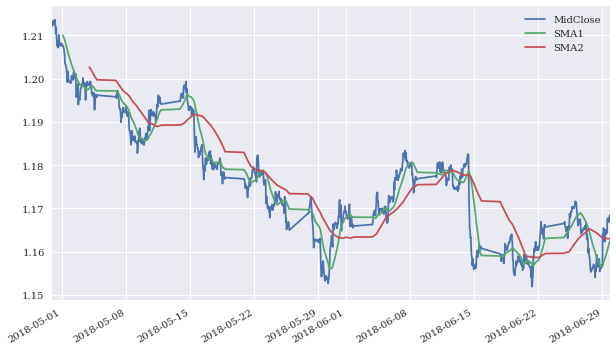

In [44]:
data[['MidClose', 'SMA1', 'SMA2']].plot(figsize=(10,6))

In [80]:
instruments = api.get_instruments()

In [81]:
print(instruments)

['EUR/USD', 'USD/JPY', 'GBP/USD', 'USD/CHF', 'EUR/CHF', 'AUD/USD', 'USD/CAD', 'NZD/USD', 'EUR/GBP', 'EUR/JPY', 'GBP/JPY', 'CHF/JPY', 'GBP/CHF', 'EUR/AUD', 'EUR/CAD', 'AUD/CAD', 'AUD/JPY', 'CAD/JPY', 'NZD/JPY', 'GBP/CAD', 'GBP/NZD', 'GBP/AUD', 'AUD/NZD', 'USD/SEK', 'EUR/SEK', 'EUR/NOK', 'USD/NOK', 'USD/MXN', 'AUD/CHF', 'EUR/NZD', 'USD/ZAR', 'USD/HKD', 'ZAR/JPY', 'USD/TRY', 'EUR/TRY', 'NZD/CHF', 'CAD/CHF', 'NZD/CAD', 'TRY/JPY', 'AUS200', 'ESP35', 'FRA40', 'GER30', 'HKG33', 'JPN225', 'NAS100', 'SPX500', 'UK100', 'US30', 'Copper', 'CHN50', 'EUSTX50', 'USDOLLAR', 'US2000', 'USOil', 'UKOil', 'SOYF', 'NGAS', 'WHEATF', 'CORNF', 'Bund', 'XAU/USD', 'XAG/USD', 'BTC/USD', 'ETH/USD', 'LTC/USD']


In [84]:
def output(data, dataframe):
    print('%3d | %s | %s | %6.5f, %6.5f'
         % (len(dataframe), data['Symbol'],
           pd.to_datetime(int(data['Updated']), unit='ms'),
            data['Rates'][0],
            data['Rates'][1]
           ))

In [86]:
api.subscribe_market_data('EUR/GBP', (output,))

In [99]:
api.get_last_price('EUR/GBP')

Bid     0.85098
Ask     0.85151
High    0.85219
Low     0.85093
Name: 2019-03-17 18:45:44.045000, dtype: float64

In [100]:
api.unsubscribe_market_data('EUR/GBP')

In [101]:
api.get_open_positions()

""
